In [1]:
import ROOT as rt

Welcome to JupyROOT 6.24/06


In [2]:
input_file = rt.TFile("~/v0_corr.root")
input_list = input_file.Get("h-lambda_eff")
input_file.Close()

Error in <TBufferFile::CheckByteCount>: object of class TList read too many bytes: 1100140560 instead of 26398736
Warning in <TBufferFile::CheckByteCount>: TList::Streamer() not in sync with data on file /Users/ryan/v0_corr.root, fix Streamer()


In [3]:
c = rt.TCanvas("main")

In [6]:
v0_dist = input_list.FindObject("fRecoEtaPtRefitRowsRatioV0LambdaDist")
res_dist = input_list.FindObject("fRecoEtaPtRefitRowsRatioLambdaDist")

In [8]:
v0_dist.GetAxis(0).SetRangeUser(0.15, 10)
res_dist.GetAxis(0).SetRangeUser(0.15, 10)

In [9]:
inv_mass_v0 = v0_dist.Projection(4).Clone("inv_mass_v0")
inv_mass_res = res_dist.Projection(4).Clone("inv_mass_res")

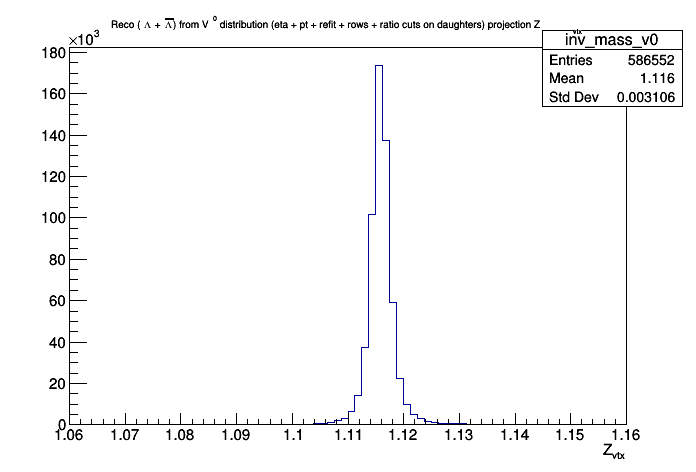

In [10]:
inv_mass_v0.Draw()
c.Draw()

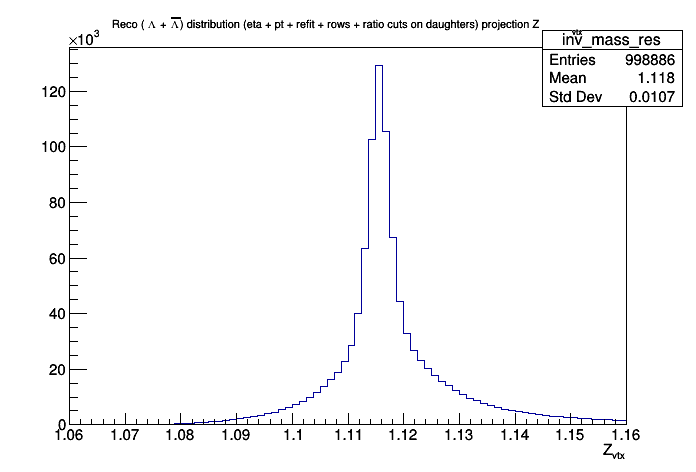

In [11]:
inv_mass_res.Draw()
c.Draw()

In [12]:
min_bin = inv_mass_res.FindBin(1.104)
max_bin = inv_mass_res.FindBin(1.128)

In [13]:
i1 = inv_mass_res.Integral(min_bin, max_bin)
i2 = inv_mass_v0.Integral(min_bin, max_bin)
print(i1, i2)

815139.0 581525.0


In [4]:
mass_lambda_v0 = input_list.FindObject("fInvMassLambdaV0")
mass_antilambda_v0 = input_list.FindObject("fInvMassAntiLambdaV0")

mass_lambda_resonance = input_list.FindObject("fInvMassLambdaResonance")
mass_antilambda_resonance = input_list.FindObject("fInvMassAntiLambdaResonance")

mass_lambda_real = input_list.FindObject("fInvMassLambdaReal")
mass_antilambda_real = input_list.FindObject("fInvMassAntiLambdaReal")

mass_lambda_difference = input_list.FindObject("fInvMassLambdaDifference")

In [5]:
mass_lambda_v0.SetTitle("#Lambda^{0} (blue) + #bar{#Lambda^{0}} (red) mass using offline V0 finder;#Lambda^{0} mass [GeV/c^{2}];Entries")

mass_lambda_resonance.SetTitle("#Lambda^{0} (blue) + #bar{#Lambda^{0}} (red) mass using resonance technique;#Lambda^{0} mass [GeV/c^{2}];Entries")

mass_lambda_real.SetTitle("#Lambda^{0} (blue) + #bar{#Lambda^{0}} (red)  mass (real) mass [GeV/c^{2}];Entries")

mass_lambda_difference.SetTitle("#Lambda^{0} mass difference (V0 - resonance);#Lambda^{0} mass [GeV/c^{2}];Entries")

In [23]:
mass_lambda_v0.SetLineColor(rt.kBlue)
mass_antilambda_v0.SetLineColor(rt.kRed)
mass_lambda_resonance.SetLineColor(rt.kBlue)
mass_antilambda_resonance.SetLineColor(rt.kRed)
mass_lambda_real.SetLineColor(rt.kBlue)
mass_antilambda_real.SetLineColor(rt.kRed)
mass_lambda_difference.SetLineColor(rt.kBlue)

In [17]:
mass_lambda_v0.Sumw2()
mass_antilambda_v0.Sumw2()
mass_lambda_resonance.Sumw2()
mass_antilambda_resonance.Sumw2()
mass_lambda_real.Sumw2()
mass_antilambda_real.Sumw2()
mass_lambda_difference.Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [18]:
mass_lambda_v0.Rebin(4)
mass_antilambda_v0.Rebin(4)
mass_lambda_resonance.Rebin(4)
mass_antilambda_resonance.Rebin(4)
mass_lambda_real.Rebin(4)
mass_antilambda_real.Rebin(4)
mass_lambda_difference.Rebin(4)

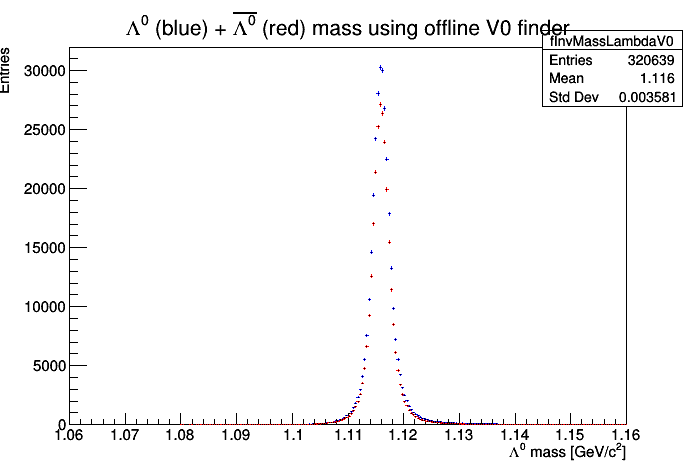

In [27]:
mass_lambda_v0.Draw()
mass_antilambda_v0.Draw("SAME")
c.Draw()

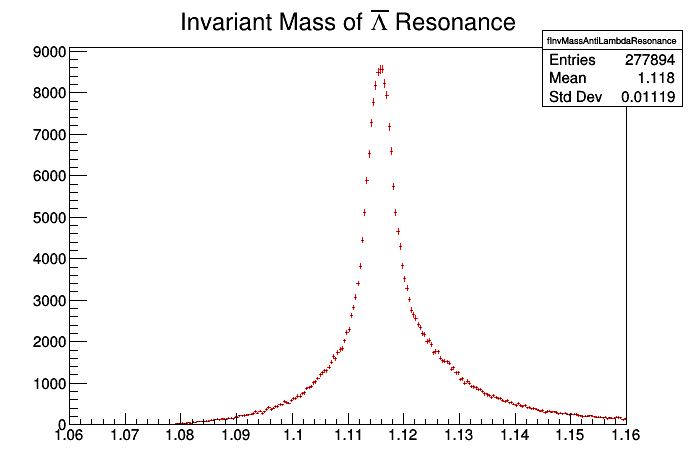

In [34]:
mass_antilambda_resonance.Draw()
c.Draw()

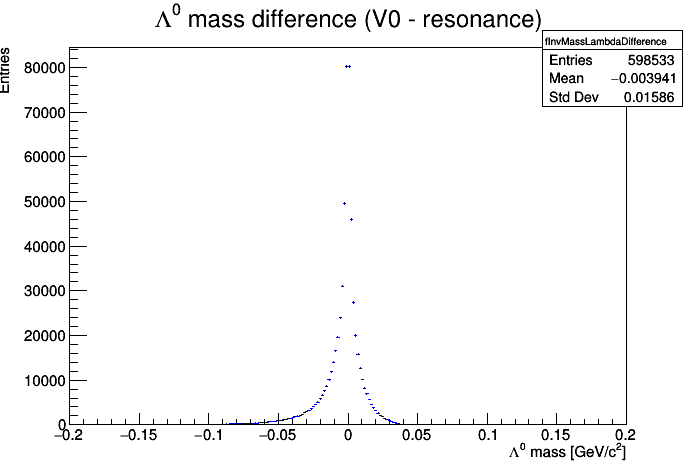

In [35]:
mass_lambda_difference.Draw()
c.Draw("SAME")

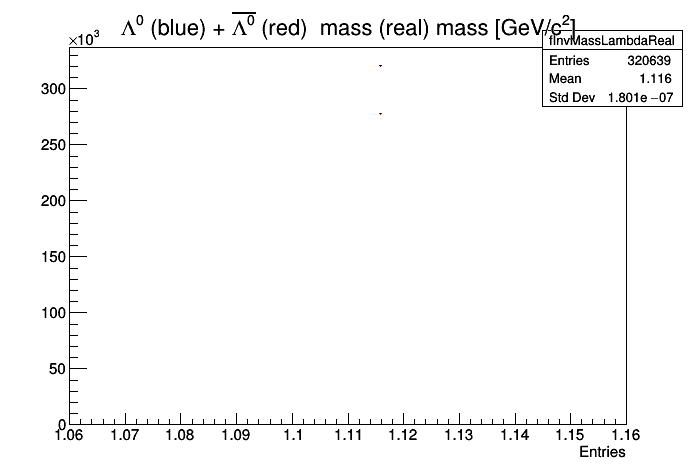

In [36]:
mass_lambda_real.Draw()
mass_antilambda_real.Draw("SAME")
c.Draw()